In [ ]:
# Run this to make sure you have the packages needed to run the notebook
!pip install seaborn numpy pandas

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Anatomy of a matplotlib figure

There are two components to a matplotlib figure:
1. [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=figure#matplotlib.figure.Figure) object which is like a canvas
2. [`Axes`](https://matplotlib.org/api/axes_api.html?highlight=axes#matplotlib.axes.Axes) object(s) that live within a  [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=figure#matplotlib.figure.Figure) object, and is where all the plotting is done.

Some things that belong to the  [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=figure#matplotlib.figure.Figure) object:
- All `Axes` objects
- Main title
- Legend

Some things that belong to the [`Axes`](https://matplotlib.org/api/axes_api.html?highlight=axes#matplotlib.axes.Axes) object:
- Plotting elements (e.g. lines, points)
- Anything axis related:
  - Range
  - Tick marks
  - Tick labels
  - Labels
  
  
You can create `Figure` and `axes` objects simultaneously using [`plt.subplots()`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=subplots#matplotlib.figure.Figure.subplots) function. Some useful keyword arguments to know:

- `figsize` : 2-tuple of floats, Figure dimension (width, height) in inches. This affects the figure size when saving. 
- `nrows` : int, # of rows of subplots
- `ncols` : int, # of cols of subplots
- `sharex`, `sharey` : bool or string, sets the same axis (range, ticks, and scale) of `axes` objects. You can control which `axes` objects share axis.
  - bool : sets all subplots with same axis
  - `row` : sets all rows with same axis
  - `col` : sets all cols with same axis
- `tight_layout` : bool, Resizes `axes` objects to remove as much empty space as possible.
- `constrained_layout` : bool, Just a better version of `tight_layout`. Highly recommonend using `constrained_layout` over `tight_layout`.
- `gridspec_kw` : dict, Arguments for finer control of sizing of subplots.
  - `width_ratios` : list, Defines the relative widths of the columns. The list does not need to sum to 1.
  - `height_ratios` : list, Defines the relative height of the rows. The list does not need to sum to 1.
  
  
`plt.subplots` returns a tuple of two objects in the following order:
- `Figure` : matplotlib Figure object
- `ax` : either `Axes` or array of `Axes objects. Return an array when you have more than one subplot with shape (nrows, ncols).

## Commonly used `Axes` methods

- [`set_xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html?highlight=set_xlabel#matplotlib.axes.Axes.set_xlabel) : sets the x-axis label
- [`set_ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html?highlight=set_ylabel#matplotlib.axes.Axes.set_ylabel) : sets the y-axis label
- [`set_title`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html?highlight=set_title#matplotlib.axes.Axes.set_title) : sets the title of an `Axes` object
- [`set_xscale`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xscale.html#matplotlib.axes.Axes.set_xscale) : Set the x-axis scale (e.g. log, linear)
- [`set_yscale`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yscale.html#matplotlib.axes.Axes.set_yscale) : Set the y-axis scale (e.g. log, linear)
- [`axhline`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html#matplotlib.axes.Axes.axhline) : draws a horizontal line in a given `Axes` object.
- [`axvline`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) : draws a vertical line in a given `Axes` object.
- [`get_legend_handles_labels`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html) : returns the handles and labels for legend

## Commonly used `Figure` methods

- [`suptitle`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=suptitle#matplotlib.figure.Figure.suptitle) : Add a centered title to the figure. This title is different from `set_title` for `Axes` objects.
- [`text`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=figure%20text#matplotlib.figure.Figure.text) : Add text to figure.
- [`legend`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=figure%20legend#matplotlib.figure.Figure.legend) : Place a legend on the figure.

## Saving figures

Some useful keyword arguments:
- `fname` : str, Path to where you want the figure saved. Set the format by ending the string with `.png` for png or `.pdf` for pdf.
- `bbox_inches` : str, I always set this as `tight`. This saves any elements that were drawn outside of the Figure.
- `dpi` : scalar, The resolution in dots per inch. Ignored if output format is vector format (e.g. pdf, svg).
- `transparent` : bool, If True, the axes patches will all be transparent

# Examples

## Lineplot with custom legend

This example shows how to make a line plot with user-defined colors and the legend outside of the plot.

In [2]:
# Generate points to plot
xrange = np.linspace(0, 5, 101)[1:]
X = np.e ** (-xrange)
Y = np.e ** (-5 * xrange)
Z = np.e ** (-1/25 * xrange)
data = np.array([xrange * 100, X, Y, Z]).T

df = pd.DataFrame(
    data,
    columns=['Sample Size', 'Algorithm 1', 'Algorithm 2', 'Algorithm 3']
)
df.head()

,Sample Size,Algorithm 1,Algorithm 2,Algorithm 3
0,5.0,0.951229,0.778801,0.998002
1,10.0,0.904837,0.606531,0.996008
2,15.0,0.860708,0.472367,0.994018
3,20.0,0.818731,0.367879,0.992032
4,25.0,0.778801,0.286505,0.990050


### Melting pandas `DataFrame`
[Melting](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) means to "unpivot" a data frame in such a way that one columns is the identifier variables (in this case, sample size) and columns containing measurements are stacked into a single column.

In [3]:
df_melted = df.melt(id_vars='Sample Size')
df_melted.head()

,Sample Size,variable,value
0,5.0,Algorithm 1,0.951229
1,10.0,Algorithm 1,0.904837
2,15.0,Algorithm 1,0.860708
3,20.0,Algorithm 1,0.818731
4,25.0,Algorithm 1,0.778801


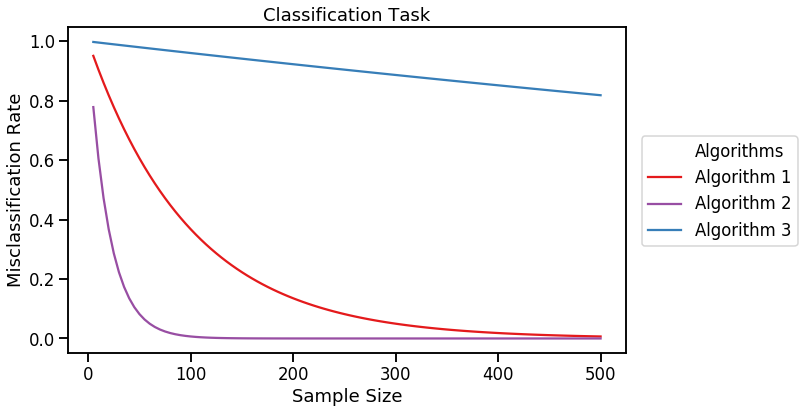

In [4]:
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    x='Sample Size', 
    y='value',
    hue='variable',
    data=df_melted,
    ax=ax,
    palette=['#e41a1c','#984ea3', '#377eb8'], # This sets custom colors,
)

# Set various labels
ax.set_xlabel("Sample Size")
ax.set_ylabel("Misclassification Rate")
ax.set_title("Classification Task")

# Deal with legends
handles, labels = ax.get_legend_handles_labels() 
labels[0] = "Algorithms" # Rename the title of legend
ax.legend().remove()
legend = fig.legend(
    handles=handles,
    labels=labels,
    ncol = 1, 
    loc='center right',
    bbox_to_anchor=(1.15, .5),
    bbox_transform=plt.gcf().transFigure
)

## Two heatmaps with shared colorbar

This example shows how to use gridspec_kw to control the sizes the subplots.

Text(0.5, 0.98, 'Plotting random matrices')

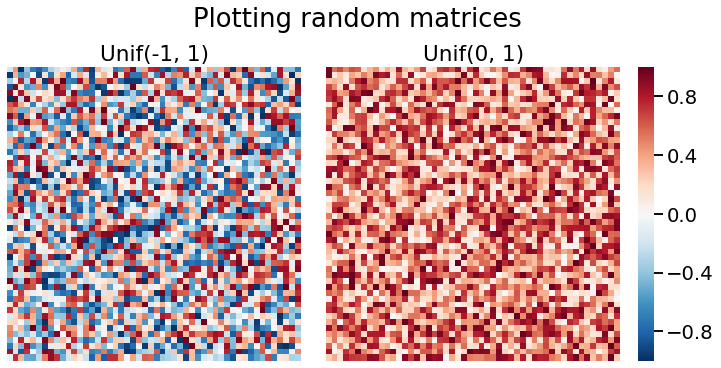

In [5]:
# Make Data
np.random.seed(1)
X = np.random.uniform(-1, 1, size=(50, 50))
Y = np.random.uniform(0, 1, size=(50, 50))

sns.set_context('talk', font_scale=1.2)

# Making our subplots
fig, axes = plt.subplots(
    ncols=3, 
    figsize=(10, 5), 
    constrained_layout=True, 
    gridspec_kw=dict(width_ratios=[1, 1, .05])
)

# Plot using seaborn heatmap function
global_kwargs = dict(
    center=0,
    vmin=-1,
    vmax=1,
    cmap='RdBu_r',
    square=True,
    xticklabels=False,
    yticklabels=False,
    cbar_ax=axes[-1],
)

sns.heatmap(
    X,
    ax=axes[0],
    **global_kwargs
)

sns.heatmap(
    Y,
    ax=axes[1],
    **global_kwargs
)

axes[0].set_title("Unif(-1, 1)")
axes[1].set_title("Unif(0, 1)")

fig.suptitle("Plotting random matrices")